In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

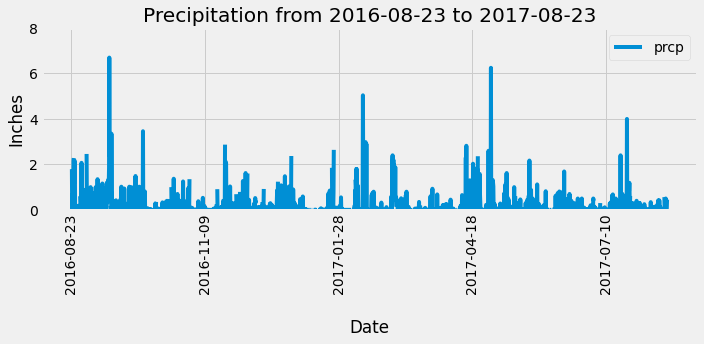

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = last_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation, columns=['date','prcp'])

df.set_index('date', inplace=True)

# # Sort the dataframe by date
df = df.sort_index()

# # # Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation from {year_ago} to {last_date}',\
                  label="Precipitation",rot=90)
plt.legend(loc="upper right")
plt.xlabel("\nDate")
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig("Output/precipitation.png")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

results = session.query(*sel).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest temperature at station USC00519281 is {results[0][0]}')
print(f'The highest temperature at station USC00519281 is {results[0][1]}')
print(f'The average temperature at station USC00519281 is {round(results[0][2],1)}')

The lowest temperature at station USC00519281 is 54.0
The highest temperature at station USC00519281 is 85.0
The average temperature at station USC00519281 is 71.7


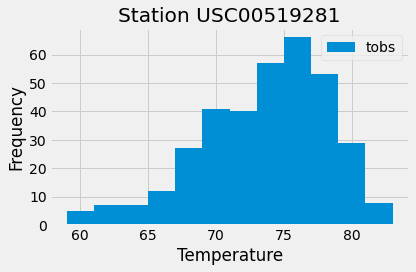

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12mon_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_ago).all()

df = pd.DataFrame(last_12mon_temp, columns=['date','tobs'])
df.set_index('date', inplace=True)
df.plot(kind='hist', bins=12)
plt.title("Station USC00519281")
plt.xlabel("Temperature")
plt.savefig("Output/tobs_most_active_statn.png")
plt.tight_layout()
plt.show()

# Close session

In [16]:
# Close Session
session.close()